# 1
## i)

Data on each coin is given from the U.S. Mint. For each data point, a class label is assigned. As we have a defined $y$, this is a supervised learning problem

## ii)

This time, no $y$ vector is provided. This vector must be learned by the machine. Therefore, this is an unsupervised learning problem

## iii)

A machine is given partial information, such as the reward, for each data point (state). Therefore, this is reinforcement learning


In [4]:
# 3
"""
Lets build a decision tree:




                   0.5- black
        0.5- bag 1
                   0.5- black
pick_bag          
                   0.5- black
        0.5- bag 2
                   0.5- white

We are looking for P(second_ball = white | first ball is black)

How many times can this happen?

We have to pick bag 1 first. We can then choose either ball from this bag. Therefore, we have the following possible scenarios:


"""



'\nLets build a decision tree:\n\n\n\n\n                   0.5- black\n        0.5- bag 1\n                   0.5- black\npick_bag          \n                   0.5- black\n        0.5- bag 2\n                   0.5- white\n\nWe are looking for P(second_ball = white | first ball is black)\n\nHow many times can this happen?\n\nWe have to pick bag 1 first. We can then choose either ball from this bag. Therefore, we have the following possible scenarios:\n\n0.5 * 0.5 = .25\n0.5 * 0.5 = .25\n\nsumming these gives:\n\nP(second_ball = white | first ball is black) = .5 = 1/2\n'

In [9]:
# 4
n = 10 # samples
mu = .55 #p(draw = red)

# Draw a sample. Compute probability that v (number of reds in sample) = 0

pv = (1-mu)**n 
print(pv)

# Answer = b




0.0003405062891601559


In [10]:
N = 1000
n = 10
mu = .55

pv = N * (1-mu) ** n
print(pv)

# Answer = d

0.3405062891601559


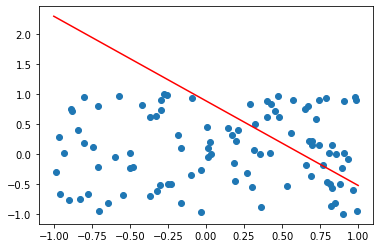

In [20]:
import numpy as np 
import matplotlib.pyplot as plt

class perceptron:
    
    def __init__(self,d,n):
        self.d =d 
        self.w = np.zeros(self.d)
        self.n = n
        self.a = 0
        self.b = 0
        self.target_set = False
        self.X = np.zeros((n,d))

    def build(self):
        x = np.random.uniform(-1,1,2)
        y = np.random.uniform(-1,1,2)

        self.a, self.b = np.polyfit(x,y,1)

        self.X = np.random.uniform(-1,1,2*self.n).reshape(self.n,self.d)

        self.target_set = True

    def f(self, X):
        if X[1] > self.a * X[0] + self.b:
            return 1
        else:
            return -1

    def g(self, x):
        return np.sign(np.dot(self.w, x))

    def train(self):
        if self.target_set != True:
            return "Target not set"

        n_iterations = 0

        convergence = []
        while True:
            
            n_iterations =+ 1
            
            # Find misclassified points
            misclassified = []

            if n_iterations == 1:
                misclassified = self.X
                
            else:
                for x in self.X:
                    y_actual = self.f(x)
                    y_predict = self.g(x)
                    if y_actual != y_predict:
                        misclassified.append(x)

            if not misclassified.all():
                break

            # choose random point

            w_old = self.w
            i = np.random.randint(0, len(misclassified))
            x = misclassified[i]
            self.w += np.array(x).T * self.f(x)
            
            convergence.append(np.sum(self.w) - np.sum(w_old))
            
            misclassified = []

        plt.plot(convergence)
        return n_iterations
        
perceptron = perceptron(2,100)   
perceptron.build()
a = perceptron.a
b = perceptron.b
x = np.linspace(-1,1,100)
y = a*x + b
plt.plot(x,y,'-r')
plt.scatter(perceptron.X[:,0], perceptron.X[:,1])

#perceptron.train()

